# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd

# Importing Dataset

In [2]:
df= pd.read_csv('heart.csv')

About Dataset

Age : Age of the patient

Sex: The person’s sex (1 = male, 0 = female)

cp: chest pain type

— Value 0: asymptomatic

— Value 1: atypical angina

— Value 2: non-anginal pain

— Value 3: typical angina

trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)

chol: The person’s cholesterol measurement in mg/dl

fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: resting electrocardiographic results

— Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria

— Value 1: normal

— Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

thalach: The person’s maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

ca: The number of major vessels (0–3)

thal: A blood disorder called thalassemia
Results of the blood flow observed via the radioactive dye.

Value 0: NULL (dropped from the dataset previously

Value 1: fixed defect (no blood flow in some part of the heart)

Value 2: normal blood flow

Value 3: reversible defect (a blood flow is observed but it is not normal)

target: Heart disease (1 = no, 0= yes)

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# Data PreProcessing

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

# Exploratory Data Analysis

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt 

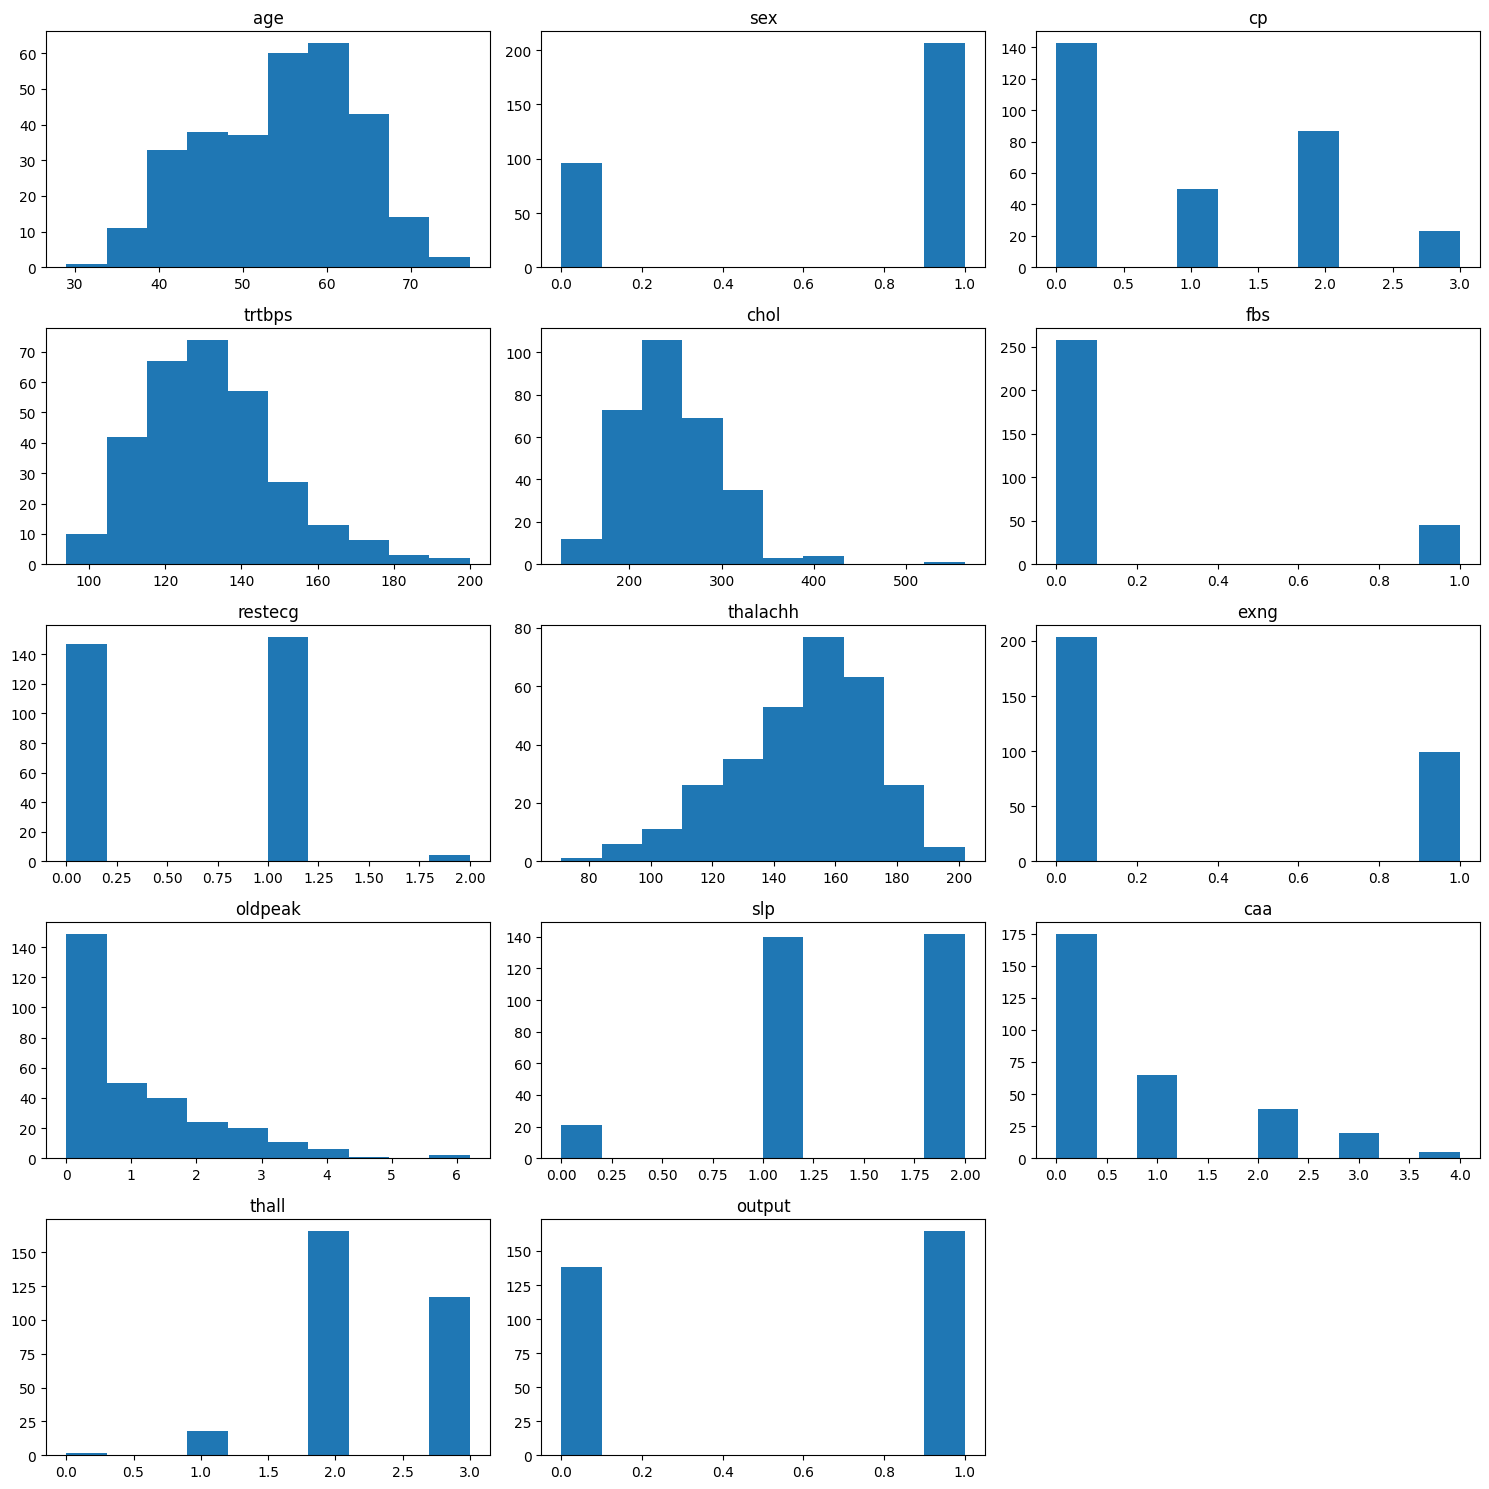

In [10]:
fig,axs= plt.subplots(5,3,figsize=(15, 15))
# Flatten the 2D array of subplots to make them easier to access
axs = axs.ravel()
for i, feature in enumerate(df.columns):
    # Plot a histogram of the feature in the current subplot
    axs[i].hist(df[feature])
    axs[i].set_title(feature)
fig.delaxes(axs[-1])

# Adjust the spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

# Outlier Analysis

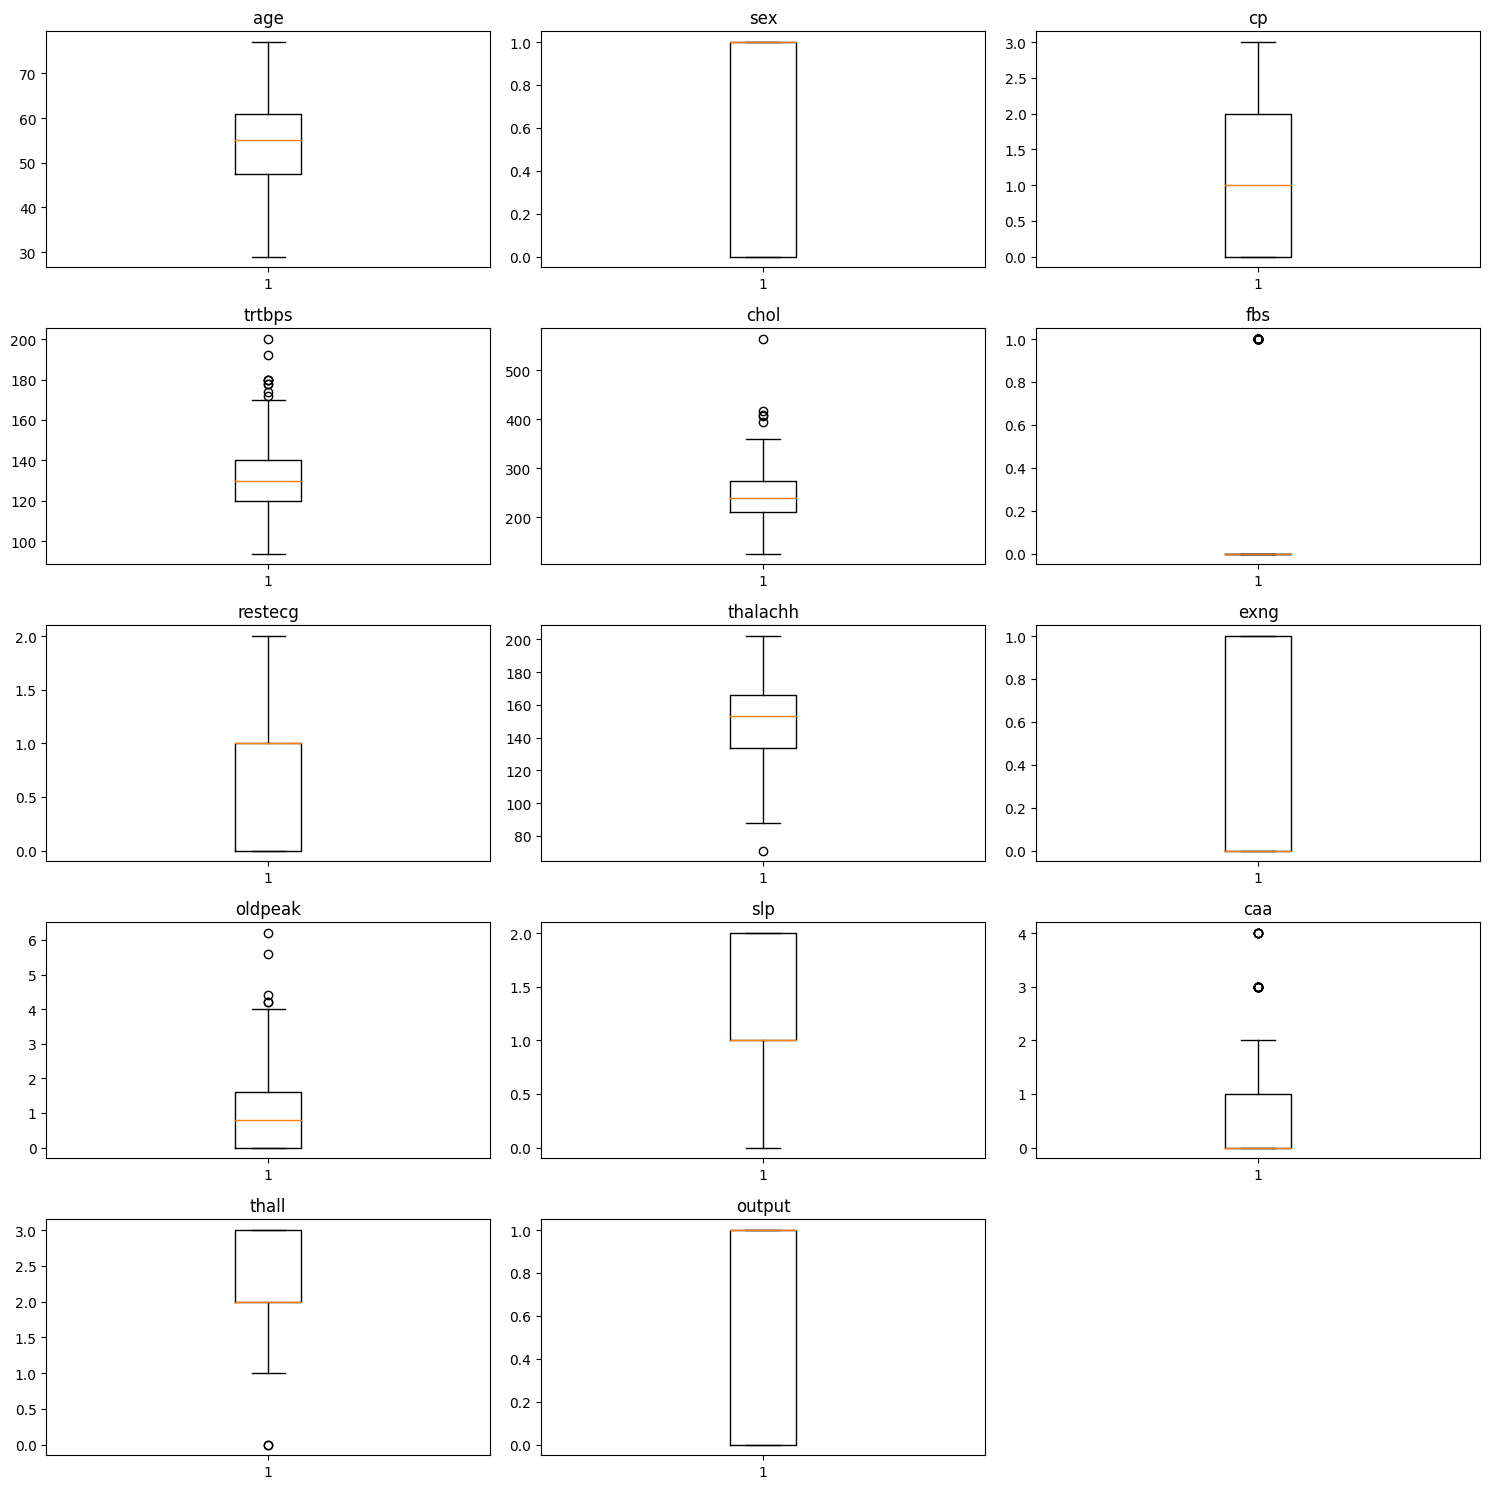

In [11]:
fig,axs= plt.subplots(5,3,figsize=(15, 15))
# Flatten the 2D array of subplots to make them easier to access
axs = axs.ravel()
for i, feature in enumerate(df.columns):
    
    axs[i].boxplot(df[feature])
    axs[i].set_title(feature)

# method used to remove an axis from a figure; here removing last grid--> 12th grid since we only have 11 numerical features
fig.delaxes(axs[-1])
# Adjust the spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

In [12]:
features=['trtbps', 'chol', 'oldpeak' ,'caa']
for i in features:
    #lower = df[i].quantile(0.10)
    upper = df[i].quantile(0.90)
    #df[i] = np.where(df[i] <lower, lower,df[i])
    df[i] = np.where(df[i] >upper, upper,df[i])
    print('Feature: ',i)
    print('Skewness value: ',df[i].skew())
    print('\n')

Feature:  trtbps
Skewness value:  -0.1352012741271468


Feature:  chol
Skewness value:  -0.09844908240560264


Feature:  oldpeak
Skewness value:  0.6346192009549019


Feature:  caa
Skewness value:  0.7698708300037694




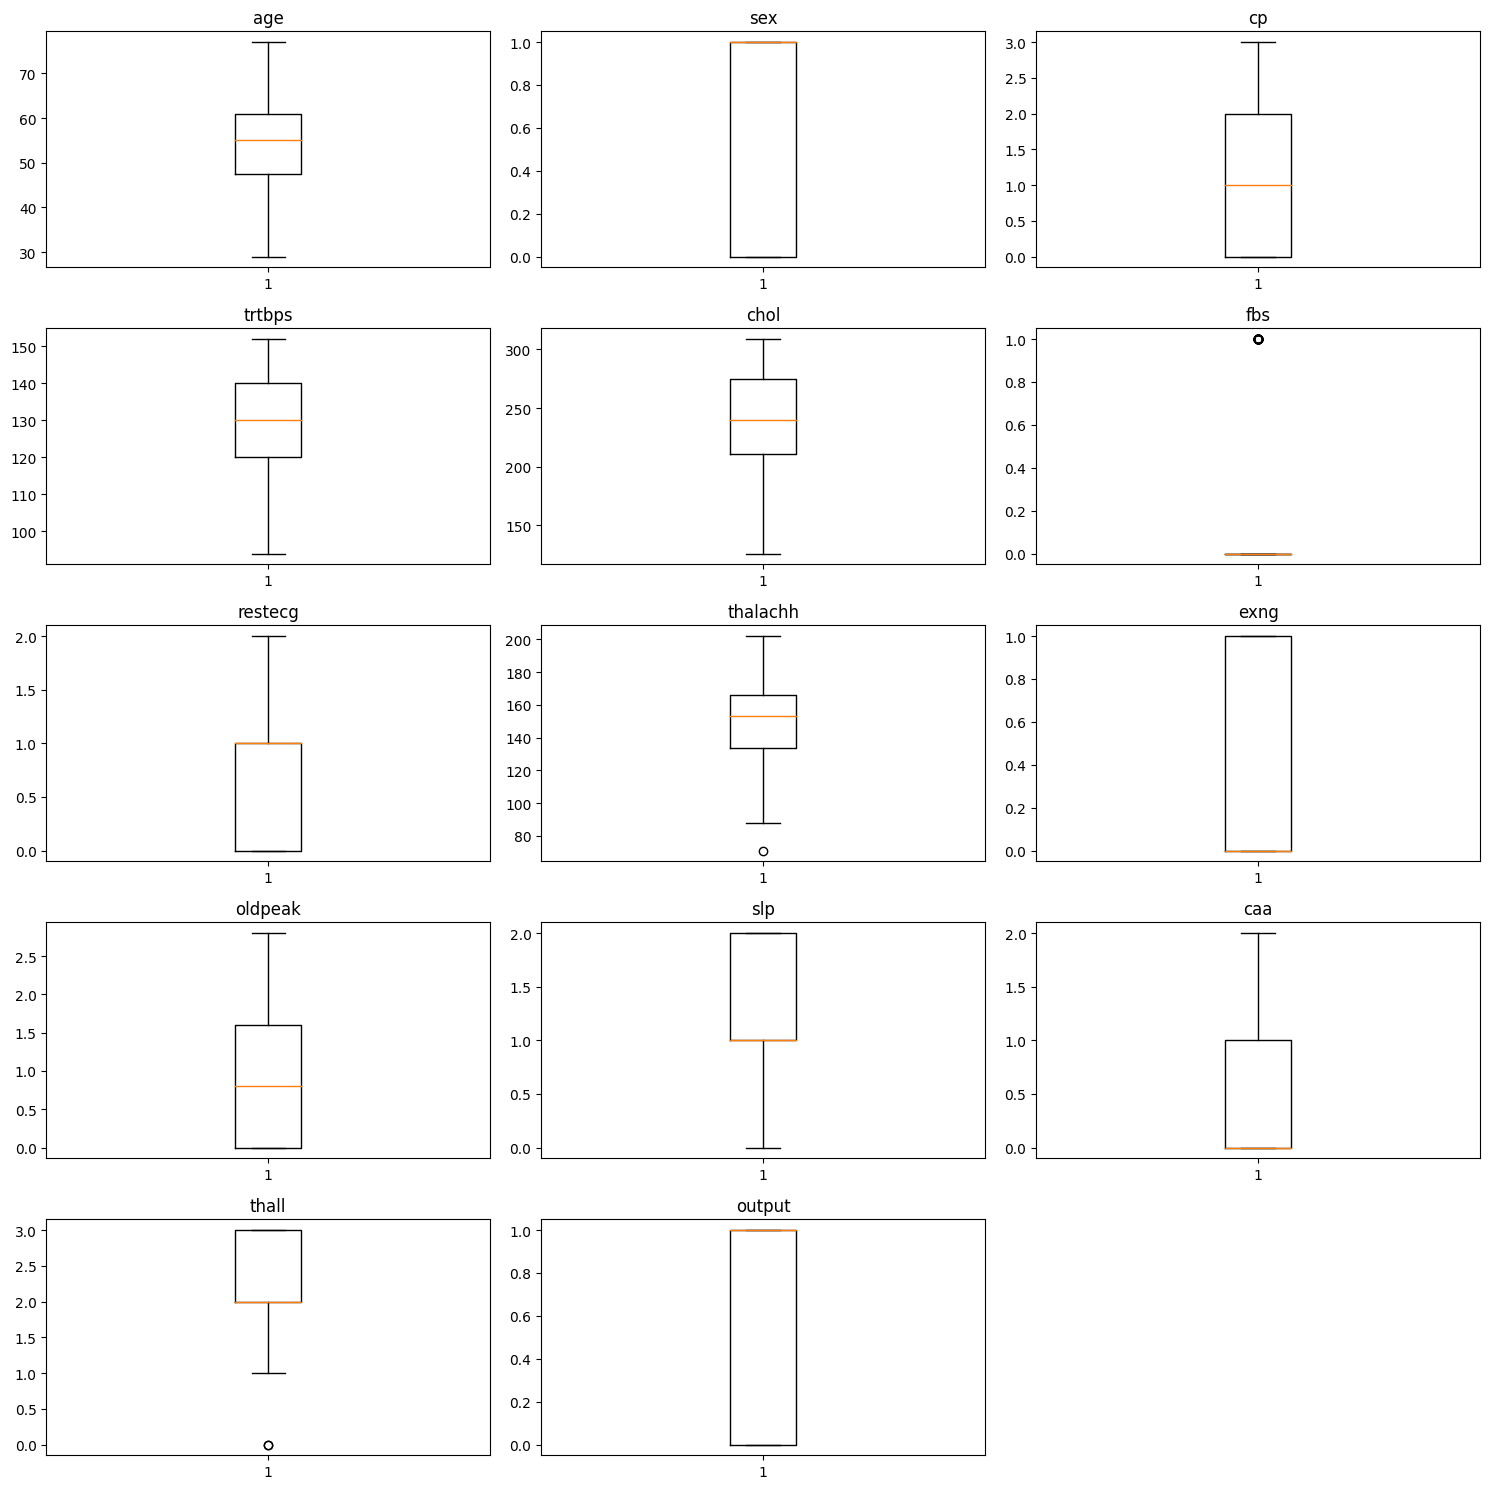

In [13]:
fig,axs= plt.subplots(5,3,figsize=(15, 15))
# Flatten the 2D array of subplots to make them easier to access
axs = axs.ravel()
for i, feature in enumerate(df.columns):
    
    axs[i].boxplot(df[feature])
    axs[i].set_title(feature)

# method used to remove an axis from a figure; here removing last grid--> 12th grid since we only have 11 numerical features
fig.delaxes(axs[-1])
# Adjust the spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

# Bivariate Analysis
Since we have continous numerical as well as categorical numerical values, we will analyse it separately with the target output to identify the relationship

## Analyzing Categorical Numerical values  : 

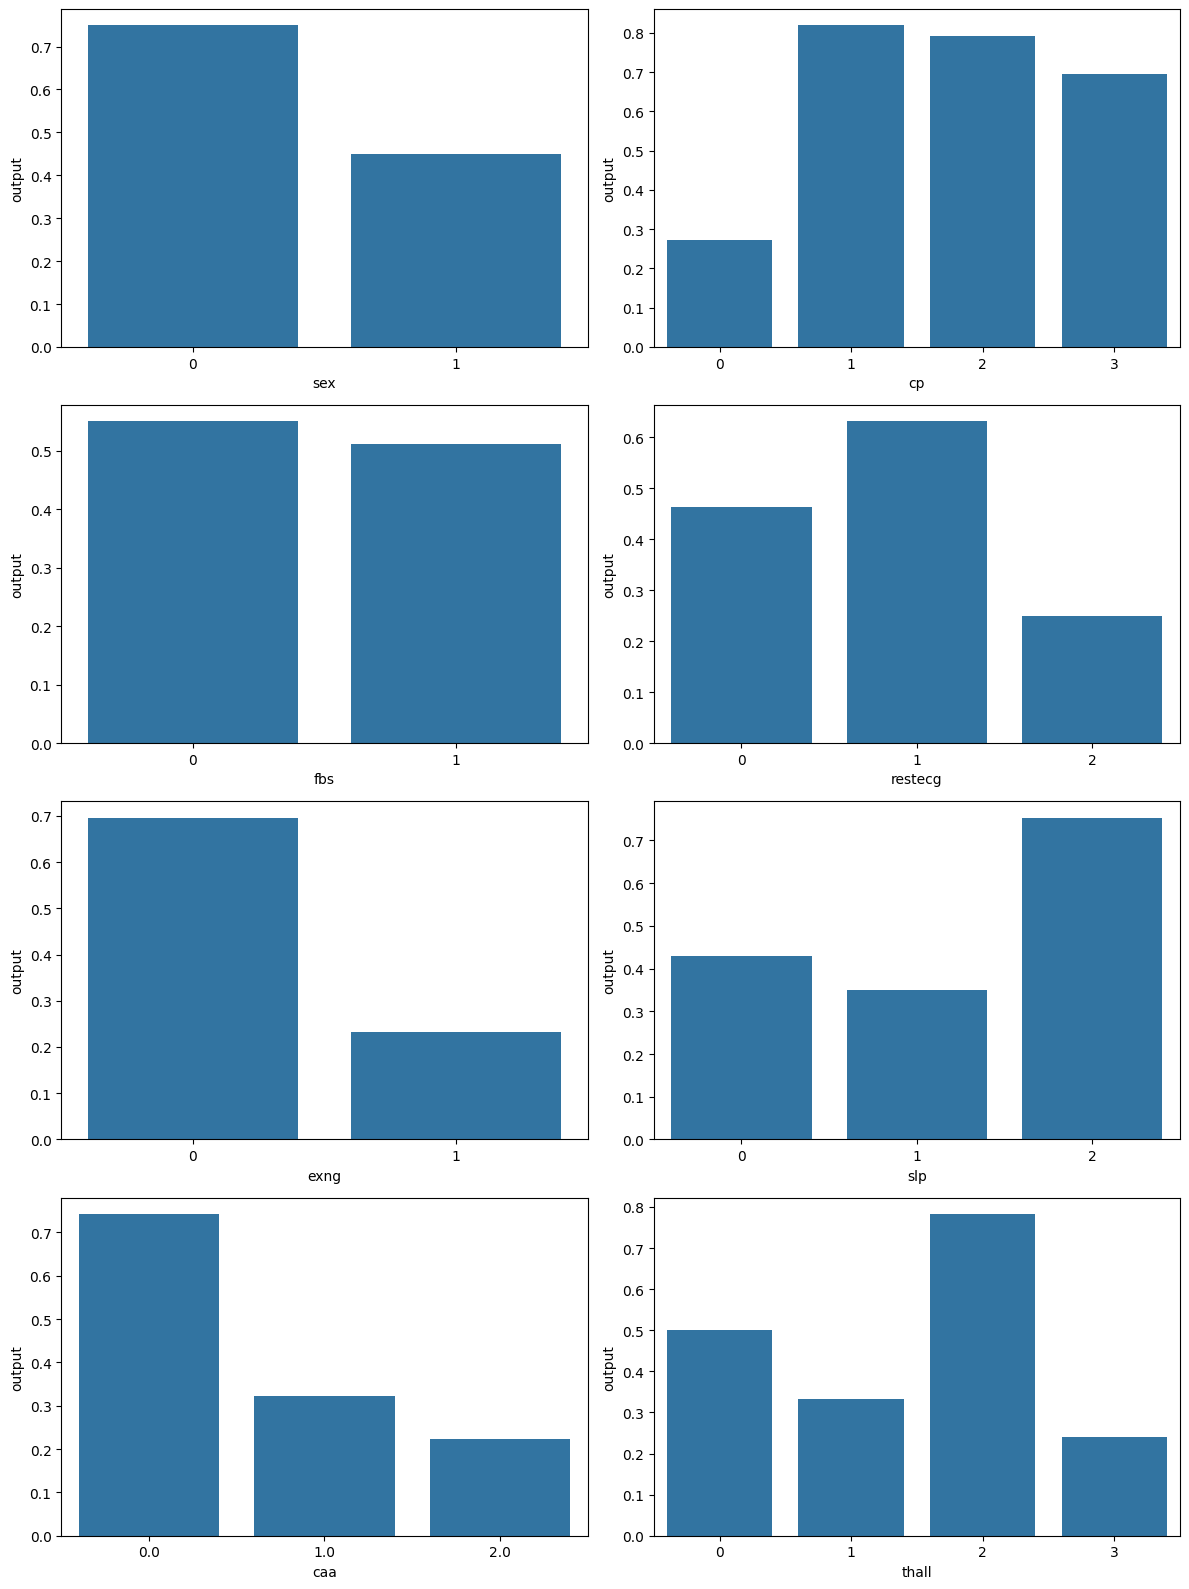

In [14]:
#categorical numerical variables
cat = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

fig, axs = plt.subplots(4, 2, figsize=(12, 16))
axs = axs.ravel()

# Loop through each column in cat
for i, col in enumerate(cat):
    sns.barplot(x=col, y='output', data=df, ax=axs[i], errorbar=None)

plt.tight_layout()
plt.show()


## Analyzing Continous Numerical values

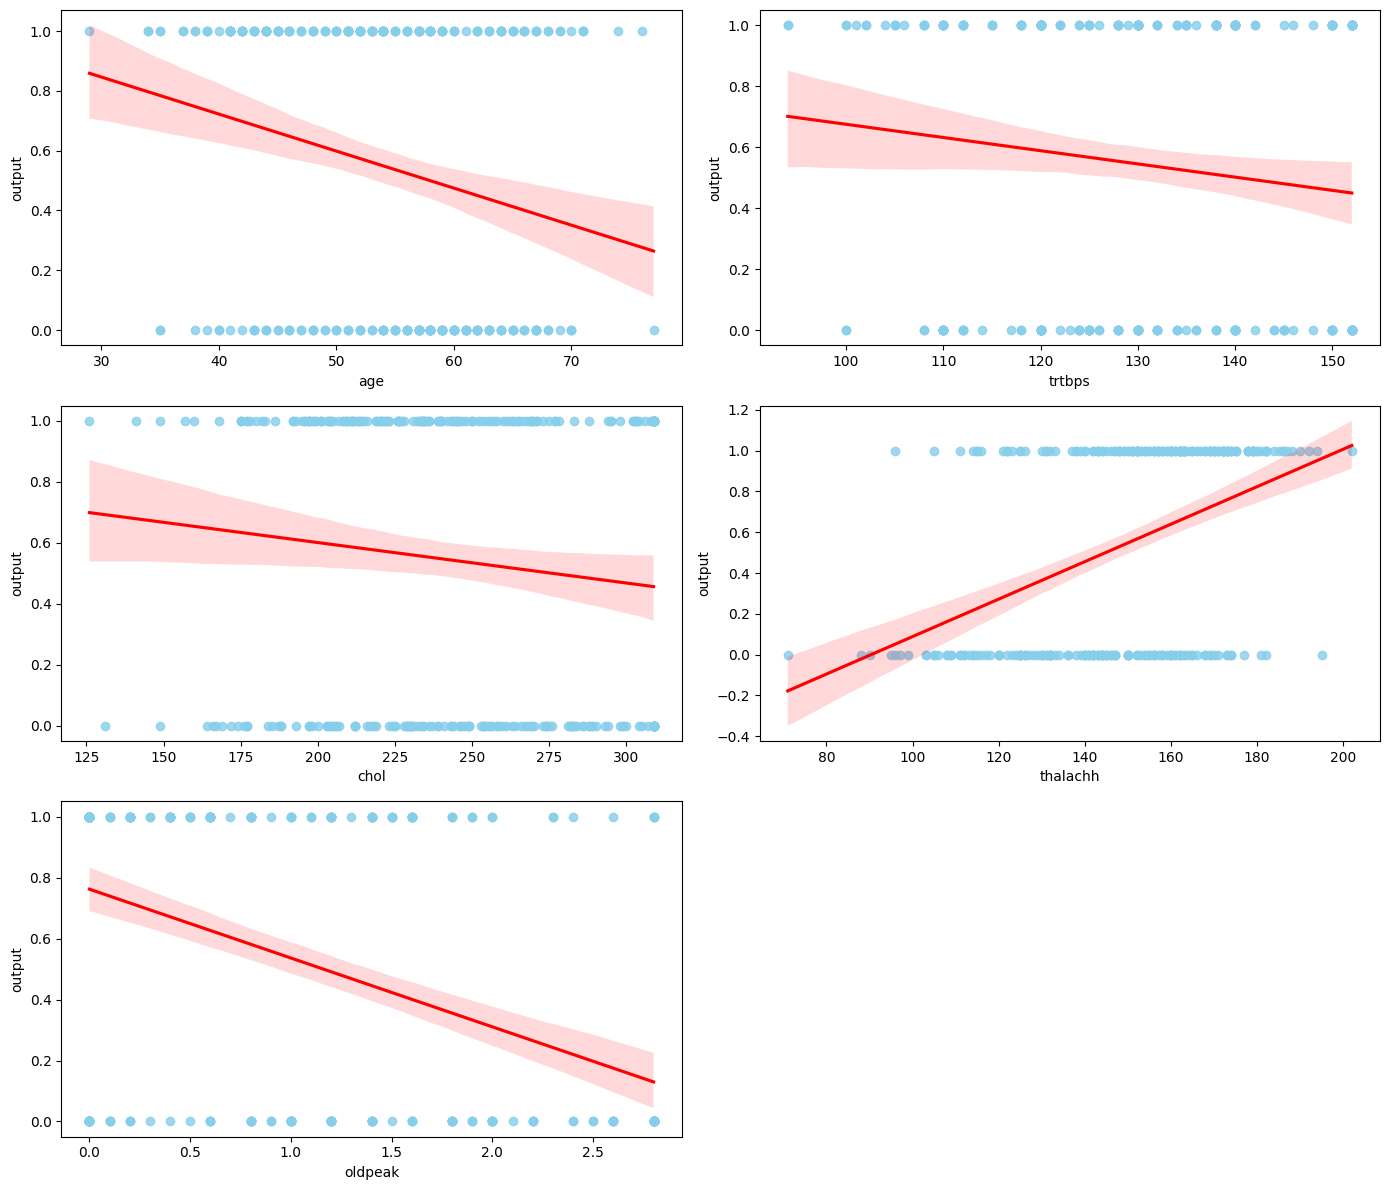

In [15]:
# Bivariate analysis of continuous numerical variables against output
bi_num = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

fig, axs = plt.subplots(3, 2, figsize=(14, 12))
axs = axs.ravel()

# Plot the regression for each feature
for i, col in enumerate(bi_num):
    sns.regplot(x=col, y='output', data=df, ax=axs[i], color='black', 
                scatter_kws={"color": "skyblue"}, line_kws={"color": "red"}, ci=95)

# Remove the extra subplot
fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()


# Correlation Matrix with Heatmap 
Correlation indicates how the features are related to each other or to the target variable.

Correlation can be positive (increase in one value, the value of the objective variable increases) or negative (increase in one value, the value of the target variable decreased).

<AxesSubplot: >

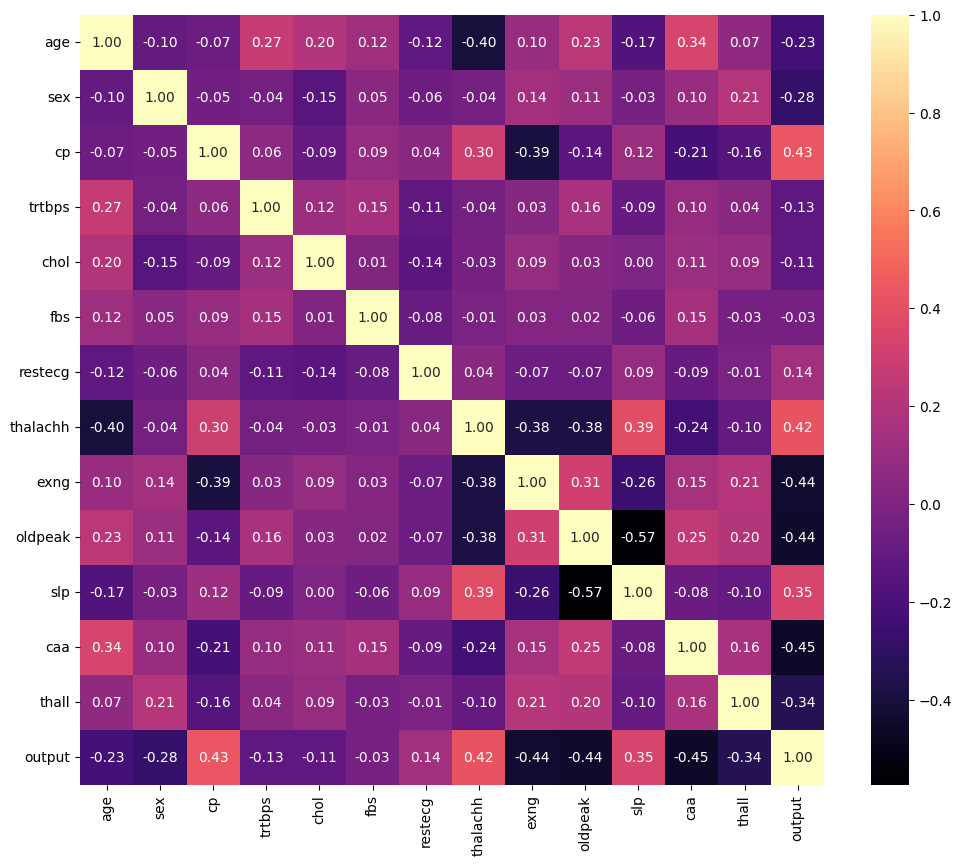

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

From this heatmap we can observe that the ‘cp’ chest pain is highly related to the target variable. Compared to relation between other two variables we can say that chest pain contributes the most in prediction of presences of a heart disease. Medical emergency is a heart attack. A cardiac occurs usually when blood clot blocks blood flow to the cardiac. Tissue loses oxygen without blood and dies causing chest pain.

# Feature Selection


### __Chi-Square Statistic__:

This value indicates how much the observed data deviates from the expected data under the assumption of independence. A larger value suggests that the feature is more dependent on the target variable (i.e., it has more predictive power).

Using Chisquare Method to find top 10 best features : 

In [17]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

data = df.copy()

# Split data into features (X) and target (y)
features  = data.iloc[:, 0:13]  # Independent columns (features)
target = data.iloc[:, -1]    # Target column (e.g., price range)

# Apply SelectKBest to extract top 10 best features using Chi-Square
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(features , target)

# Create a DataFrame with feature names and their corresponding Chi-Square scores
featureScores = pd.DataFrame({
    'Feature': features.columns,
    'Chi-Square Score': fit.scores_
})

# Sort the DataFrame by score in descending order to get the best features
top_features = featureScores.nlargest(12, 'Chi-Square Score')

# Display the top 12 features
print(top_features)

     Feature  Chi-Square Score
7   thalachh        188.320472
11       caa         63.880835
2         cp         62.598098
9    oldpeak         58.459547
8       exng         38.914377
4       chol         29.182680
0        age         23.286624
10       slp          9.804095
1        sex          7.576835
3     trtbps          7.535041
12     thall          5.791853
6    restecg          2.978271


### __Mutual Information__:

Mutual information describes relationships in terms of uncertainty. The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other. If you knew the value of a feature, how much more confident would you be about the target? 

It is equal to zero if and only if two random variables are independent ,and higher values mean higher dependency

In [18]:
X= df.drop('output',axis=1)
y= df.output

#using mutual_info_classif for classification problem MI
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores

cp          0.124457
oldpeak     0.109656
caa         0.105660
thall       0.098906
chol        0.065732
thalachh    0.056766
exng        0.048719
slp         0.040281
fbs         0.037625
restecg     0.022754
trtbps      0.013009
sex         0.007920
age         0.006395
Name: MI Scores, dtype: float64

cp, thall, exng, and thalachh are the top 5 features which are dependant with output feature.

age, trtbps and restecg does not have any dependancy.

We'll train and test with top 6 features and test the accuracy and then with all the features and test the accuracy and auc score

# Spilitting into training and testing data sets(80% for training, 20%for testing)

In [19]:
from sklearn.model_selection import train_test_split

# dataset split
# creating a function for dataset split
def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)#Further spilitting traing set to 25% validation set
    return (train_X, val_X, train_y, val_y)

# Function for normalization of data

In [20]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)  # Transform X
    return X_scaled  # Return the scaled X

# Implementing Decision Tree

In [21]:
model=[]

In [22]:
# With top 7 selected features based on feature selection

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

#assigning the features under a list

features=['thall','caa','cp','exng','oldpeak','chol','thalachh']
X= df[features]
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

tree_model= DecisionTreeClassifier(random_state=1)
tree_model.fit(X_train, y_train)
preds= tree_model.predict(X_val)

a='Decision Tree with top 7'
acc=accuracy_score(y_val,preds)*100
roc=roc_auc_score(y_val,preds)

print('ACCURACY: ',acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))

ACCURACY:  75.40983606557377
AUC score:  0.7565359477124184


In [23]:
# Paramter Tunning for the 7 feautres

X= df[features]
y= df.output

depth = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]
leaf=[1, 5, 10, 15, 20, 500, 100, 200]
scores=[]
for d in depth:
      for l in leaf:
        dmodel = DecisionTreeClassifier(random_state=0,max_depth=d,min_samples_leaf=l)
        dmodel.fit(X_train, y_train)

        pred1 = dmodel.predict(X_val)
        acc= accuracy_score(y_val,pred1)*100
        auc = roc_auc_score(y_val,pred1)
        #print('%4s %s -> auc %.3f accuracy  %.2f' % (d, l, auc, acc))

        scores.append((d,l,auc))

In [24]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

pivot2 = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
pivot2.round(3)

auc                                                   \
max_depth           NaN   1.0    2.0    3.0    4.0    5.0    6.0    10.0   
min_samples_leaf                                                           
1                 0.808  0.686  0.756  0.789  0.789  0.812  0.834  0.808   
5                 0.831  0.686  0.756  0.789  0.838  0.831  0.831  0.831   
10                0.801  0.686  0.756  0.801  0.801  0.801  0.801  0.801   
15                0.756  0.686  0.756  0.756  0.756  0.756  0.756  0.756   
20                0.756  0.686  0.756  0.756  0.756  0.756  0.756  0.756   
100               0.500  0.500  0.500  0.500  0.500  0.500  0.500  0.500   
200               0.500  0.500  0.500  0.500  0.500  0.500  0.500  0.500   
500               0.500  0.500  0.500  0.500  0.500  0.500  0.500  0.500   

                                
max_depth          15.0   20.0  
min_samples_leaf                
1                 0.808  0.808  
5                 0.831  0.831  
10                0.801  0.801  
15                0.756  0.756  
20                0.756  0.756  
100               0.500  0.500  
200               0.500  0.500  
500               0.500  0.500

In [25]:
# Trying all the features of dataset

X= df.drop('output',axis=1)
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

tree_model= DecisionTreeClassifier(random_state=1)
tree_model.fit(X_train, y_train)
preds= tree_model.predict(X_val)

a='Decision Tree with all features'
acc=accuracy_score(y_val,preds)*100
roc=roc_auc_score(y_val,preds)

print('ACCURACY: ',acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))

ACCURACY:  72.1311475409836
AUC score:  0.7156862745098039


# Final Selcted parameters and features for Decision Tree Model

In [26]:
#finalized decision tree model
features=['thall','caa','cp','oldpeak','exng','chol','thalachh']
X= df[features]
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

tree_model= DecisionTreeClassifier(random_state=1,max_depth=4,min_samples_leaf=5)
tree_model.fit(X_train, y_train)
preds= tree_model.predict(X_val)

a='Decision Tree with parameter tuning'
acc=accuracy_score(y_val,preds)*100
roc=roc_auc_score(y_val,preds)

print('ACCURACY: ',acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))

ACCURACY:  83.60655737704919
AUC score:  0.8376906318082789


# Random Forest

## Implementing Random forest classifier with top 7 features

In [27]:
from sklearn.ensemble import RandomForestClassifier

X= df[features]
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

a='Random Forest with top 7'
acc=accuracy_score(y_val,preds)*100
roc=roc_auc_score(y_val,preds)

print('ACCURACY: ',acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))

ACCURACY:  85.24590163934425
AUC score:  0.8523965141612201


## Implementing Random forest classifier with top all features

In [28]:
X= df.drop('output',axis=1)
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

a='Random Forest with all features'
acc=accuracy_score(y_val,preds)*100
roc=roc_auc_score(y_val,preds)

print('ACCURACY: ',acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))

ACCURACY:  86.88524590163934
AUC score:  0.8671023965141612


Since we have higher accuracy and AUC score with all features included, so we will go with the later.

## Random Forest Hyperparameter Tuning using GridSearchCV

In [29]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2', None]
# Maximum number of levels in tree
max_depth = [10, 20, 30, None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [30]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['sqrt', 'log2', None], 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [31]:
rf_Model = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, 
                       param_grid = param_grid, 
                       cv = 3, 
                       verbose=2,
                       n_jobs = -1)

In [32]:
# blocking it , as will take time to run again 

# rf_Grid.fit(X_train, y_train)

In [33]:
# rf_Grid.best_params_

In [34]:
# rf_Grid.best_score_

In [35]:
# Fitting the model with best parametes: 

X= df.drop('output',axis=1)
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

# Initialize and train the RandomForest model
forest_model = RandomForestClassifier(bootstrap=True, max_depth=10, max_features='sqrt', 
                                      min_samples_leaf=1, min_samples_split=10, 
                                      n_estimators=10, random_state=42)
forest_model.fit(X_train, y_train)

# Predictions
preds = forest_model.predict(X_val)

a='Random Forest with parameter tuning'
acc=accuracy_score(y_val,preds)*100
roc=roc_auc_score(y_val,preds)

print('ACCURACY: ',acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))

ACCURACY:  85.24590163934425
AUC score:  0.8485838779956427


# XGB classifer

## Implementing XGB classifer with top 7 features

In [36]:
from xgboost import XGBClassifier

X= df[features]
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
a='XGB with top 7 features'
acc=accuracy_score(y_val,prediction_xgb)*100
roc=roc_auc_score(y_val,prediction_xgb)

print('ACCURACY: ',acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))

ACCURACY:  85.24590163934425
AUC score:  0.8562091503267972


## Implementing XCB classifier with all features

In [37]:
X= df.drop('output',axis=1)
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
a='XGB with all features'
acc=accuracy_score(y_val,prediction_xgb)*100
roc=roc_auc_score(y_val,prediction_xgb)

print('ACCURACY: ',acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))

ACCURACY:  85.24590163934425
AUC score:  0.8523965141612201


## XGB model with parameter tuning with top 7 features

In [38]:
X= df[features]
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

estimators=[50,100,150,200,250,300]
depth=[2,3,4,5,6]

score=[]
score1=[]

for d in depth:
     for n in estimators:
        xgb_model = XGBClassifier(learning_rate=0.05,n_estimators=n,max_depth=d)

        xgb_model.fit(X_train, y_train)
        prediction_xgb = xgb_model.predict(X_val)
        acc= accuracy_score(y_val,prediction_xgb)*100
        auc = roc_auc_score(y_val,prediction_xgb)

        score1.append((n,d,auc))
        
        
#making it as dataframe
columns = ['n_estimators', 'max_depth', 'auc']
df_scores = pd.DataFrame(score1, columns=columns)

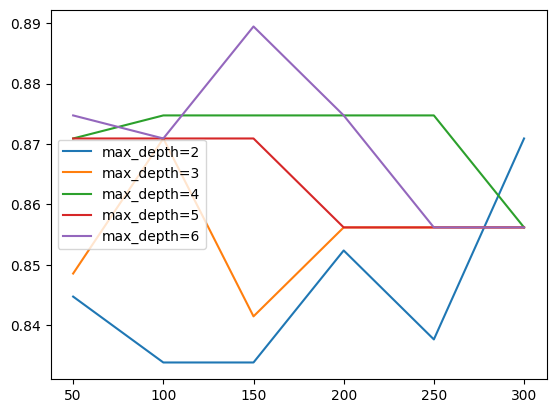

In [39]:
for d in depth:
    subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(subset.n_estimators, subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [40]:
#picking max_depth=6 and estimators range between 100-200 ->190
X= df[features]
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

xgb_model = XGBClassifier(learning_rate=0.05,n_estimators=190,max_depth=6)
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
a='XGB with parameter tuning'
acc=accuracy_score(y_val,prediction_xgb)*100
roc=roc_auc_score(y_val,prediction_xgb)

print('ACCURACY: ',acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))

ACCURACY:  86.88524590163934
AUC score:  0.8747276688453158


# Support Vector Machine (SVM)


## Implementing SVM with top 7 features

In [41]:
from sklearn.svm import SVC

X = df[features]
y = df['output']

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

svm_model = SVC()
svm_model.fit(X_train, y_train)
prediction_svm = svm_model.predict(X_val)

a='SVM with top 7 features'

acc=accuracy_score(y_val,prediction_svm)*100
roc=roc_auc_score(y_val,prediction_svm)

print('ACCURACY: ', acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))

ACCURACY:  81.9672131147541
AUC score:  0.8115468409586056


# Naive Bayes

## Implementing Naive Bayes with top 7 features

In [42]:
from sklearn.naive_bayes import GaussianNB

X = df.drop('output',axis=1)
y = df['output']

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on the validation set
predictions_nb = nb_model.predict(X_val)

# Compute accuracy and AUC score
accuracy = accuracy_score(y_val, predictions_nb) * 100
roc = roc_auc_score(y_val, predictions_nb)

a = 'Naive Bayes with all features'

print('ACCURACY: ', accuracy)
print('AUC score: ', roc)

# Storing model performance
model.append((a, round(accuracy, 4), round(roc, 4)))

ACCURACY:  85.24590163934425
AUC score:  0.840958605664488


# Logistic Regression

## Implementing Logistic Regression with top 7 features

In [43]:
from sklearn.linear_model import LogisticRegression

X = df[features]
y = df['output']

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predict on the validation set
predictions_logreg = logreg_model.predict(X_val)

# Compute accuracy and AUC score
accuracy = accuracy_score(y_val, predictions_logreg) * 100
roc = roc_auc_score(y_val, predictions_logreg)

a = 'Logistic Regression with 7 features'

print('ACCURACY: ', accuracy)
print('AUC score: ', roc)

# Storing model performance
model.append((a, round(accuracy, 4), round(roc, 4)))

ACCURACY:  78.68852459016394
AUC score:  0.778322440087146


## Implementing Logistic Regression with all features

In [44]:
from sklearn.linear_model import LogisticRegression

X= df.drop('output',axis=1)
y = df['output']

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predict on the validation set
predictions_logreg = logreg_model.predict(X_val)

# Compute accuracy and AUC score
accuracy = accuracy_score(y_val, predictions_logreg) * 100
roc = roc_auc_score(y_val, predictions_logreg)

a = 'Logistic Regression with all features'

print('ACCURACY: ', accuracy)
print('AUC score: ', roc)

# Storing model performance
model.append((a, round(accuracy, 4), round(roc, 4)))

ACCURACY:  80.32786885245902
AUC score:  0.7968409586056645


## Logistic Regression with Hyperparameter Tuning Using GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

X= df.drop('output',axis=1)
y = df['output']

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

# Initialize Logistic Regression model
logModel  = LogisticRegression()

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]


clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

best_clf = clf.fit(X,y)


print('Best Parameters: ', best_clf.best_estimator_)

best_clf.best_estimator_

print (f'Accuracy - : {best_clf.score(X,y):.3f}')



Fitting 3 folds for each of 1600 candidates, totalling 4800 fits
Best Parameters:  LogisticRegression(C=1.623776739188721, penalty='l1', solver='saga')
Accuracy - : 0.868


C:\Python3.10\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3120 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python3.10\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python3.10\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Python3.10\lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python3.10\lib\site-package

Running with the best parameters

In [46]:
from sklearn.linear_model import LogisticRegression

X= df.drop('output',axis=1)
y = df['output']

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

logreg_model = LogisticRegression(C=0.5923477198135996, max_iter=100, penalty='l2', solver='liblinear')
logreg_model.fit(X_train, y_train)

# Predict on the validation set
predictions_logreg = logreg_model.predict(X_val)

# Compute accuracy and AUC score
accuracy = accuracy_score(y_val, predictions_logreg) * 100
roc = roc_auc_score(y_val, predictions_logreg)

a = 'Logistic Regression with parameter tuning'

print('ACCURACY: ', accuracy)
print('AUC score: ', roc)

# Storing model performance
model.append((a, round(accuracy, 4), round(roc, 4)))

ACCURACY:  81.9672131147541
AUC score:  0.8115468409586056


# Selecting Final Model

In [47]:
columns=['models','Accuracy','ROC']
model= pd.DataFrame(model, columns=columns)
model

,models,Accuracy,ROC
0,Decision Tree with top 7,75.4098,0.7565
1,Decision Tree with all features,72.1311,0.7157
2,Decision Tree with parameter tuning,83.6066,0.8377
3,Random Forest with top 7,85.2459,0.8524
4,Random Forest with all features,86.8852,0.8671
5,Random Forest with parameter tuning,85.2459,0.8486
6,XGB with top 7 features,85.2459,0.8562
7,XGB with all features,85.2459,0.8524
8,XGB with parameter tuning,86.8852,0.8747
9,SVM with top 7 features,81.9672,0.8115


In [48]:
import pickle

# Save the model to a file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

# features=['thall','caa','cp','oldpeak','exng','chol','thalachh']

In [49]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145.0,233.0,1,0,150,0,2.3,0,0.0,1,1
1,37,1,2,130.0,250.0,0,1,187,0,2.8,0,0.0,2,1
2,41,0,1,130.0,204.0,0,0,172,0,1.4,2,0.0,2,1
3,56,1,1,120.0,236.0,0,1,178,0,0.8,2,0.0,2,1
4,57,0,0,120.0,308.8,0,1,163,1,0.6,2,0.0,2,1


In [50]:
# Testing the model
with open('xgb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

X= df[features]
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)
X = scale(X)

prediction = loaded_model.predict(X_val)

# Evaluate the saved model using Accuracy and AUC-ROC
acc = accuracy_score(y_val, prediction) * 100
roc = roc_auc_score(y_val, prediction)

# Print the evaluation results
print('Accuracy of loaded model: ', round(acc, 4))
print('AUC Score of saved model: ', round(roc, 4))

Accuracy of loaded model:  86.8852
AUC Score of saved model:  0.8747
